In [24]:
import pymysql
import pandas as pd
import re

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np
import seaborn


In [25]:
mbti_db = pymysql.connect(
    user='1zo',
    passwd='multi1234!',
    host='13.112.232.65',
    db='tweets',
    charset='utf8'
)

In [26]:
cursor = mbti_db.cursor(pymysql.cursors.DictCursor)

In [27]:
sql = "SELECT * FROM tweet_save"
cursor.execute(sql)
collect_save = cursor.fetchall()
collect_save

[{'name': '십분',
  'text': '이럴수가.. 2021년 소득이 아니라 2020년에 소득이 있어야 해서 청년희망적금 가입대상자가 아님…',
  'created_at': '2022-02-18T01:59:25.000Z',
  'author_id': '1262333424485851136',
  'username': 'just1_10minutes',
  'id': '1494491715197358081'},
 {'name': '카리스쨩 그 패 까봐. 사쿠라야?',
  'text': '청년희망적금 막차탔네 난 아직 나라가 인정한 청년이라고!',
  'created_at': '2022-02-18T01:52:01.000Z',
  'author_id': '633966669',
  'username': 'KarisNote',
  'id': '1494489853270003713'},
 {'name': '김용중',
  'text': '청년희망적금 신청, 연 10% 금리 가능 https://t.co/1J2vdBRDPN',
  'created_at': '2022-02-18T01:41:04.000Z',
  'author_id': '1489037839874818048',
  'username': 'gim_yongjung',
  'id': '1494487096215875586'},
 {'name': '최승호',
  'text': '월요일에 청년희망적금 신청하기',
  'created_at': '2022-02-18T01:34:37.000Z',
  'author_id': '3287728730',
  'username': 'Cess_ho',
  'id': '1494485472084512768'},
 {'name': 'zero',
  'text': '다음주부터 청년희망적금\n출시일주일은 오부제신청\n다들 확인하세요 https://t.co/bsYob4D5MD',
  'created_at': '2022-02-18T01:30:07.000Z',
  'author_id': '126789280

In [28]:
dict_count = Counter({})

for data in collect_save :
    okt = Okt()
    nouns = okt.nouns(data['text']) # 명사만 추출

    words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

    c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
    dict_count = dict_count + c
print(dict_count)

Counter({'적금': 3530, '청년': 3515, '희망': 3338, '가입': 994, '신청': 732, '은행': 325, '소득': 301, '오늘': 213, '사람': 186, '방법': 164, '조건': 149, '금리': 132, '신한': 118, '대상자': 113, '부제': 112, '신한은행': 111, '자격': 110, '지금': 108, '대상': 103, '국민은행': 98, '진짜': 93, '출시': 90, '가능': 87, '오류': 86, '뉴스': 86, '내일': 81, '미리보기': 80, '이자': 78, '완료': 75, '생각': 73, '계좌': 72, '모두': 72, '확인': 71, '조회': 71, '농협': 71, '우대금리': 71, '하나': 70, '국민': 68, '작년': 68, '계속': 67, '출처': 65, '이번': 62, '기준': 62, '연봉': 62, '대기': 62, '알바': 61, '기간': 61, '지원': 60, '때문': 60, '시간': 60, '백수': 58, '서버': 57, '어플': 55, '대통령': 55, '네이버': 54, '그냥': 54, '통장': 52, '그거': 51, '우리은행': 50, '다음': 50, '이율': 48, '혜택': 48, '우리': 47, '월급': 46, '이제': 45, '요건': 44, '허용': 43, '포카': 42, '바로': 41, '최대': 41, '건가': 39, '비교': 39, '첫날': 39, '접속': 39, '폭주': 39, '시작': 38, '미리': 38, '개설': 38, '주간': 38, '해당': 36, '이체': 36, '성공': 36, '시도': 36, '고양이': 36, '정리': 35, '이하': 35, '나이': 35, '정부': 35, '우대': 35, '레드': 35, '벨벳': 35, '다시': 34, '확대': 34, '유라': 34, '청약': 33, '매달':

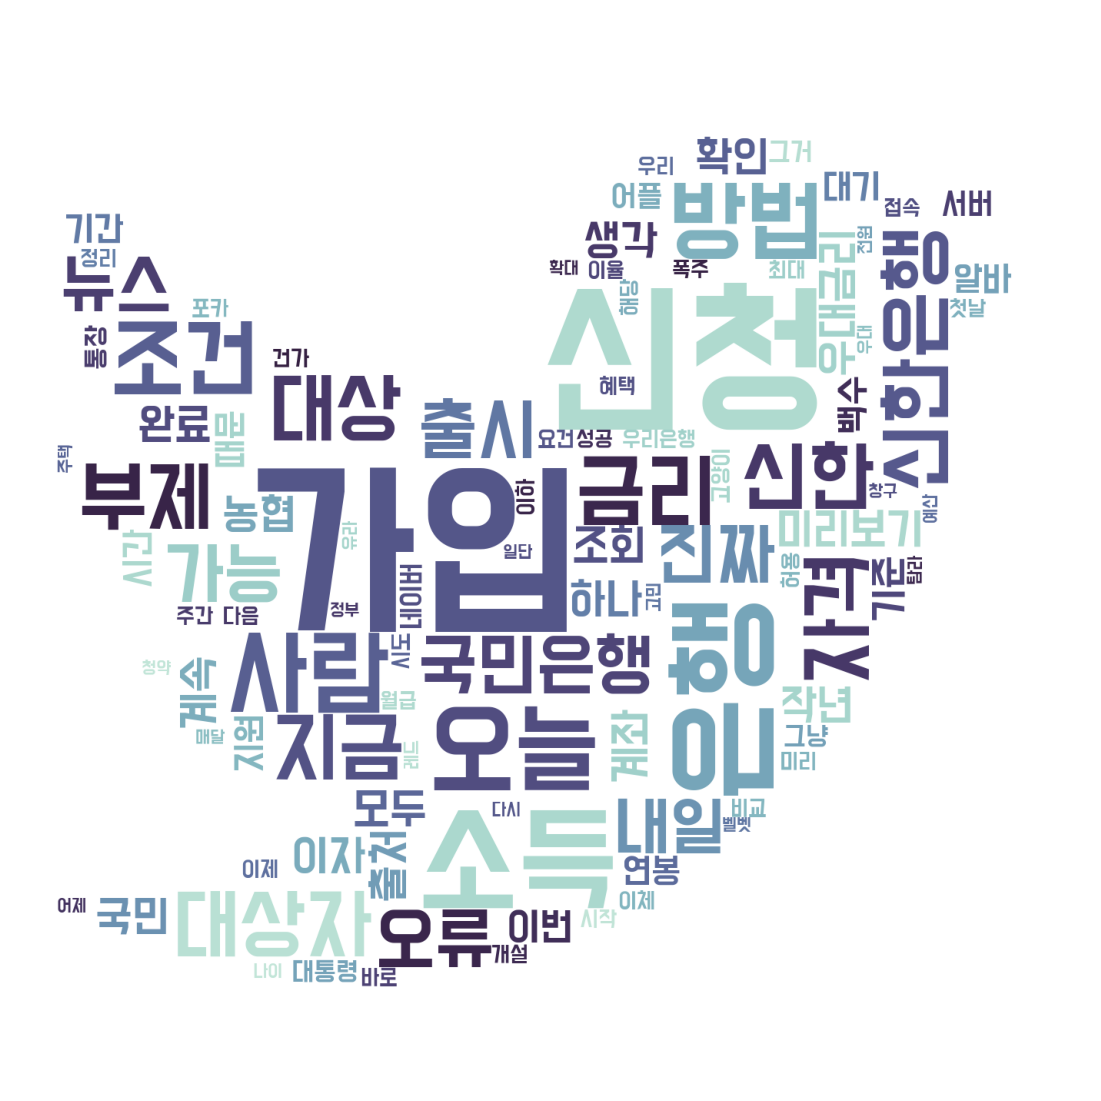

In [63]:
icon = Image.open('./tweeticon.png')

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

palettes = ['spring', 'summer', 'seismic','PuBu']
cmap = seaborn.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

wc = WordCloud(font_path='./BMDOHYEON_ttf.ttf', colormap = cmap, max_words = 300, mask=mask
               , background_color='white', width=600, height=400, scale=5.0, max_font_size=45)
gen = wc.generate_from_frequencies(dict_count)

plt.figure(figsize=(30,20))
plt.axis('off')
plt.imshow(gen)